In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
def first_number(error):
    error = str(error)
    if "e" in error:
        return error[0]
    else:
        error = error.strip("0.")
        return error[0]

# C SIMULATION

### Acceptance rates

In [45]:
def acc_rates(a_list,lamb,start=1,size=10):
    plt.figure(figsize=(15,5))
    for a in a_list:
        df = pd.read_csv(f"./Datos/Oscillator/acc_rates/acc_l_{lamb}_a_{a}.csv")

        epsilons = df["epsilon"]
        acc_rates = df["mean"]
        stderrs = df["se"]

        plt.errorbar(epsilons,acc_rates,stderrs,marker="o",ls="-",ecolor="k",label=f"a={a}")

    plt.axhline(0.75,color = "brown",alpha=0.4,ls="--",xmin=0,xmax=1,label="Target acc rate = 0.75") #Objetivo de 0.75 de acc_rate
    plt.xlabel("Epsion")
    plt.ylabel("Acc rates")
    plt.title(f"Acceptance rates\n lambda={lamb}\n  size={size}, start={start}, samples = 1000")
    plt.xticks(np.arange(0,1.1,0.1))
    plt.xlim(0)
    plt.grid()
    plt.legend()
    plt.show()

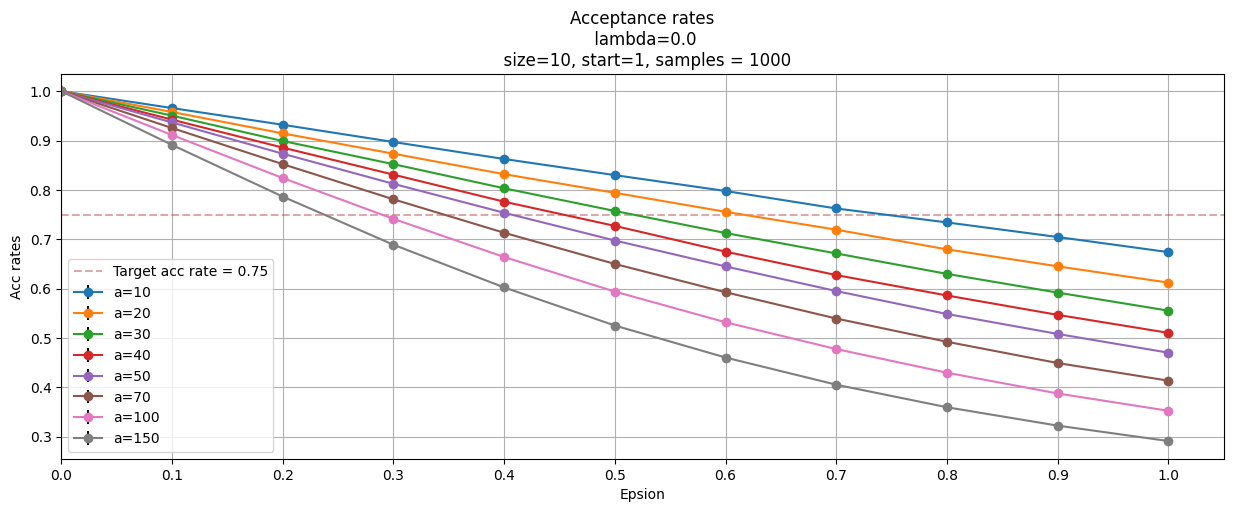

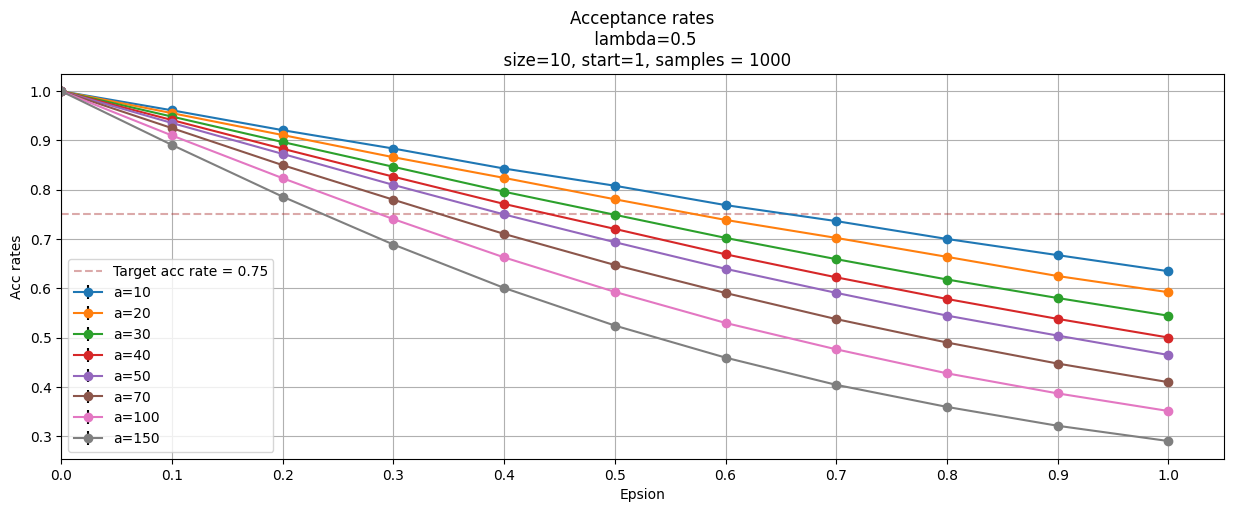

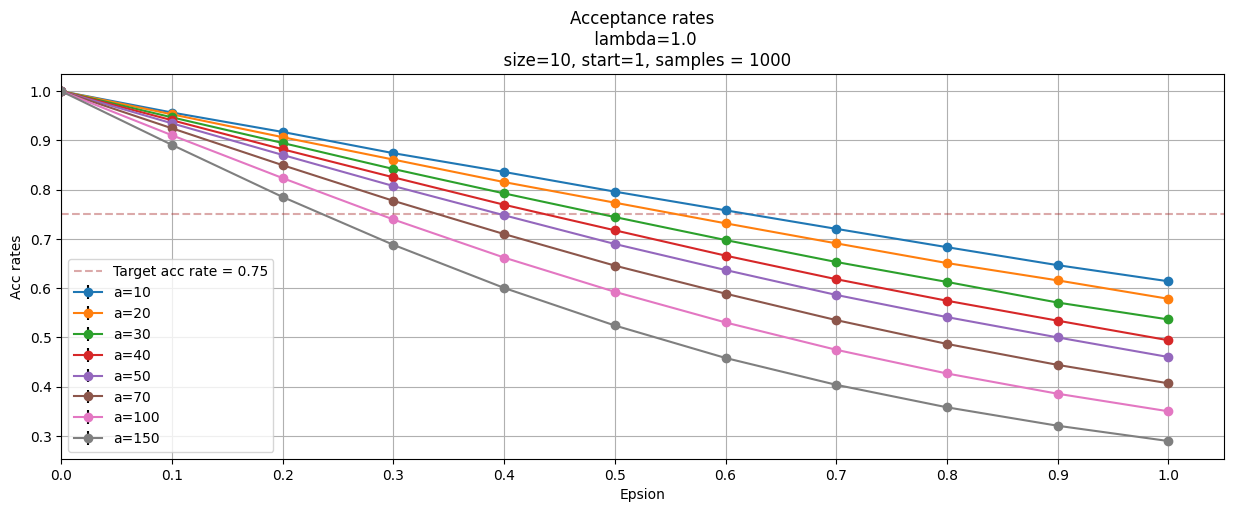

In [46]:
a_list = ["10","20","30","40","50","70","100","150"]
acc_rates(a_list,lamb="0.0")
acc_rates(a_list,lamb="0.5")
acc_rates(a_list,lamb="1.0")

### Action vs sweeps


In [117]:
def hot_cold(lamb):
    df = pd.read_csv(f"./Datos/Oscillator/SE/lambda_{lamb}.csv",on_bad_lines="skip")
    
    y0 = df["SE_cold"]
    y1 = df["SE_hot"]

    plt.figure(figsize=(20,5))
    #plt.plot(y0,marker="o",alpha=0.5,color="blue",label=f"Cold start: mean = {y0.mean():0.4f}$\pm${np.sqrt(y0.var()/len(y0)):0.3f}")
    plt.plot(y1,marker="s",alpha=0.5,color="red",label=f"Hot start: mean = {y1.mean():0.4f}$\pm${np.sqrt(y1.var()/len(y1)):0.3f}")

    #plt.axhline(y0.mean(),color = "k", label = "cold mean")
    plt.axhline(y1.mean(),color = "grey", label = "hot mean")

    plt.title("S_E vs sweeps\nsweeps: 510000\ntermalization: 1000, steps: 10\na=1, measurements = 10000, λ=%s"%(lamb))

    plt.xlabel("sweeps")
    plt.xlim(50000,50100)
    plt.ylabel("$S_E$")
    plt.legend()
    plt.show()
    

In [ ]:
hot_cold(lamb="0")
hot_cold(lamb="0.5")
hot_cold(lamb="1.0")

In [3]:
def energy_plot(x,y,yerr,lambda_):
    def theoretical_energy(x,a,b):
        return a*x**2+b

    x_theo = np.linspace(0,1,100)

    popt,pcov = curve_fit(theoretical_energy,x,y,sigma=yerr)

    residuals = (y - theoretical_energy(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err_comp, b_err_comp = np.sqrt(np.diag(pcov))
    a_err, b_err = first_number(a_err_comp), first_number(b_err_comp)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_energy(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"{popt[0]:0.4f}({a_err}) $x^2$ + {popt[1]:0.4f}({b_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}",color = "white")

    plt.title("$E_0$ vs $\Delta t$\n $\lambda$ = "+f"{lambda_}")
    plt.ylabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()

    print(f"a = {popt[0]} , b = {popt[1]}")
    print(f"err_a = {a_err_comp}, err_b= {b_err_comp}")
    print(f"Reduced chi-squared = {reduced_chi_squared}")

<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9m/45g79tt50mbg4g33hq_qp__00000gn/T/ipykernel_36338/1435044341.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.plot([],[],label=f"{popt[0]:0.4f}({a_err}) $x^2$ + {popt[1]:0.4f}({b_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}",color = "white")
/var/folders/9m/45g79tt50mbg4g33hq_qp__00000gn/T/ipykernel_36338/1435044341.py:28: SyntaxWarning: invalid escape sequence '\D'
  plt.title("$E_0$ vs $\Delta t$\n $\lambda$ = "+f"{lambda_}")
/var/folders/9m/45g79tt50mbg4g33hq_qp__00000gn/T/ipykernel_36338/1435044341.py:30: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta t$")


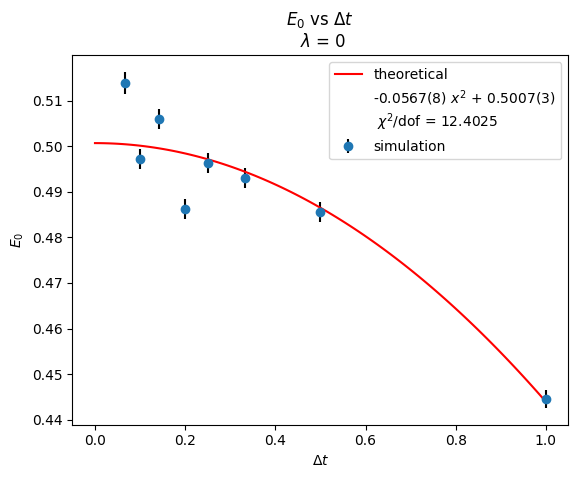

a = -0.05673325092297967 , b = 0.5006660432781969
err_a = 0.00804521733130066, err_b= 0.0032234540809901505
Reduced chi-squared = 12.402453310122565


In [14]:
x = np.array([10,20,30,40,50,70,100,150])
x = 10/x

data  = pd.read_csv(r"Datos/oscillatorF/gs_l0.csv")
y = data[" E_0"]
yerr = data[" err"]

lambda_ = 0
energy_plot(x,y,yerr,lambda_)


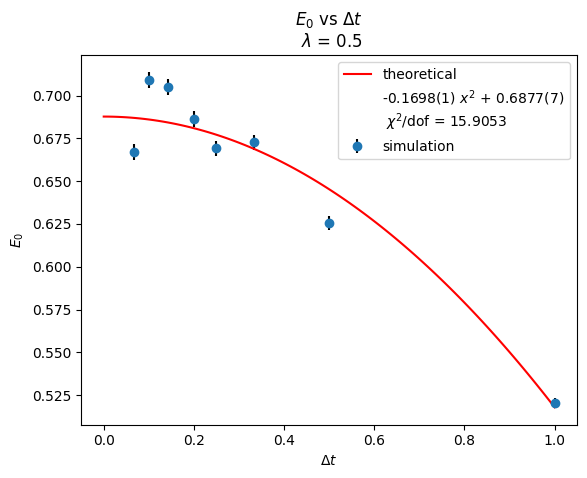

a = -0.16983973421278442 , b = 0.6877173210056239
err_a = 0.0146607796718413, err_b= 0.007269487580268426
Reduced chi-squared = 15.905341281229687


In [15]:
x = np.array([10,20,30,40,50,70,100,150])
x = 10/x

data  = pd.read_csv(r"Datos/oscillatorF/gs_l05.csv")
y = data[" E_0"]
yerr = data[" err"]

lambda_ = 0.5
energy_plot(x,y,yerr,lambda_)

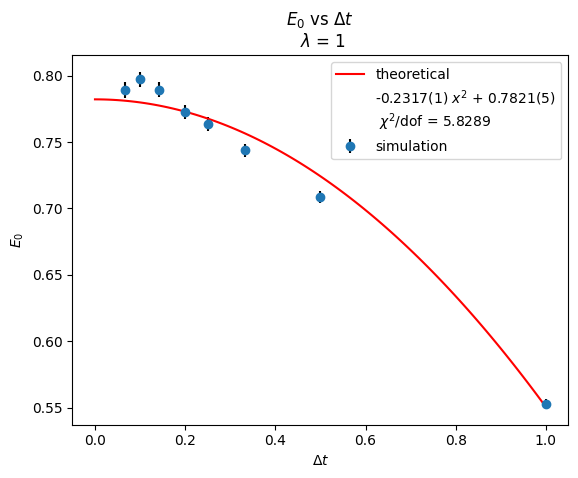

a = -0.2316736134674374 , b = 0.7821345003039721
err_a = 0.010026514626677696, err_b= 0.005293951672090302
Reduced chi-squared = 5.828869795490877


In [16]:
x = np.array([10,20,30,40,50,70,100,150])
x = 10/x

data  = pd.read_csv(r"Datos/oscillatorF/gs_l1.csv")
y = data[" E_0"]
yerr = data[" err"]

lambda_ = 1
energy_plot(x,y,yerr,lambda_)

In [22]:
def corr_plot(x,y,yerr,lambda_):
    def theoretical_corr(x,a,xi):
        return a*np.cosh((x-20)/xi)

    x_theo = np.linspace(0,40,100)

    popt,pcov = curve_fit(theoretical_corr,x,y,sigma=yerr)

    residuals = (y - theoretical_corr(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err_comp, xi_err_comp = np.sqrt(np.diag(pcov))
    a_err, xi_err = first_number(a_err_comp), first_number(xi_err_comp)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_corr(x_theo,*popt),color="red",label = "theoretical")
    #plt.plot([],[],label=f"a = {popt[0]}({a_err}), $\xi$ = {popt[1]}({xi_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("corr(d)\n $\lambda$="+ f"{lambda_}")
    plt.ylabel("$corr$")
    plt.xlabel("$d = N$")
    plt.legend()
    plt.show()

    print(f"a = {popt[0]} , xi = {popt[1]}")
    print(f"err_a = {a_err_comp}, err_xi = {xi_err_comp}")
    print(f"Reduced chi-squared = {reduced_chi_squared}")

<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\l'
/var/folders/9m/45g79tt50mbg4g33hq_qp__00000gn/T/ipykernel_36338/3547126921.py:28: SyntaxWarning: invalid escape sequence '\l'
  plt.title("corr(d)\n $\lambda$="+ f"{lambda_}")


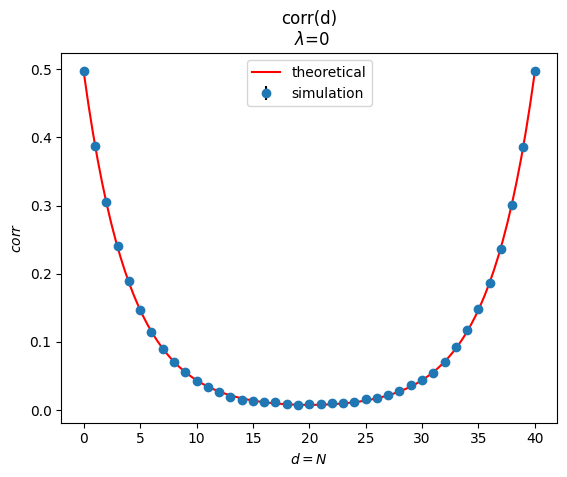

a = 0.007639692153094581 , xi = 4.111649950716565
err_a = 8.980359794070968e-05, err_xi = 0.010987508459106295
Reduced chi-squared = 0.7690353553867708


In [23]:
x = np.arange(0,41,1)

data  = pd.read_csv(r"Datos/oscillatorF/corr_l0.csv")
y = data[" corr"]
yerr = data[" err"]

lambda_ = 0
corr_plot(x,y,yerr,lambda_)


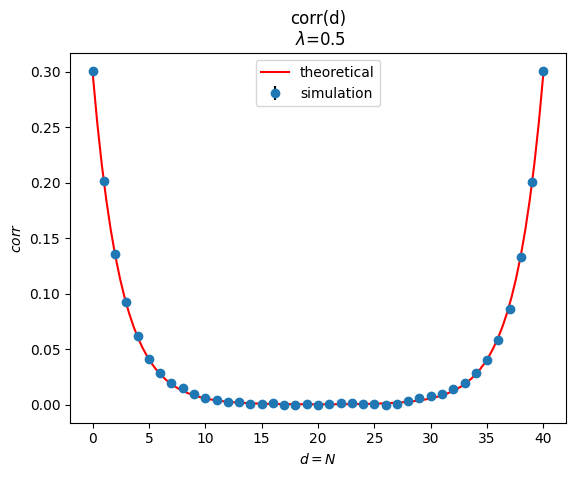

a = 0.00020590091592118847 , xi = 2.5073780185584265
err_a = 7.880061654346075e-06, err_xi = 0.012670298876823008
Reduced chi-squared = 1.8764224624046824


In [24]:
x = np.arange(0,41,1)

data  = pd.read_csv(r"Datos/oscillatorF/corr_l05.csv")
y = data[" corr"]
yerr = data[" err"]

lambda_ = 0.5
corr_plot(x,y,yerr,lambda_)

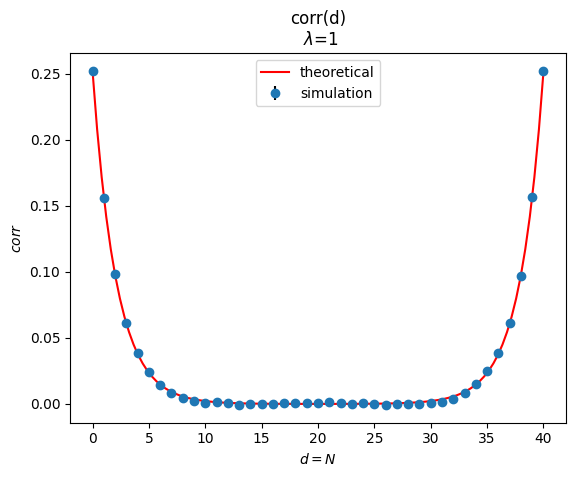

a = 3.8886395125403696e-05 , xi = 2.1123004867338726
err_a = 1.687779352017729e-06, err_xi = 0.010084256915899478
Reduced chi-squared = 1.4760804360441284


In [25]:
x = np.arange(0,41,1)

data  = pd.read_csv(r"Datos/oscillatorF/corr_l1.csv")
y = data[" corr"]
yerr = data[" err"]

lambda_ = 1
corr_plot(x,y,yerr,lambda_)